# Import required libraries

In [2]:
import torch
from sys import platform
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Model

In [3]:
MODEL_CODE = "yolo11n" # YOLOv8 pretrained on Open Images v7
FOLDER_NAME = "detection_results"

In [4]:
def detect(model, img_path: str) -> list:
    """
    Detect objects in an image using a YOLO model.
    Args:
        model: YOLO model
        img_path: path to the image
    Returns:
        results: list of detected objects
    """
    device = 'cuda' if torch.cuda.is_available() else ('mps' if platform == 'darwin' else 'cpu')
    results = model(img_path, save=True, show_boxes=True, device=device)
    return results


def plot_result(result: list):
    """
    Plot the results of the detection.
    Args:
        results: list of detected objects
    """
    plot = result.plot()[:, :, ::-1] # BGR to RGB
    plt.imshow(plot)
    plt.axis('off')
    plt.show()


Found https://media.designcafe.com/wp-content/uploads/2019/11/17060449/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg locally at Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg


/media/tommy/Volume/Uni/Computer Vision/project/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


image 1/1 /media/tommy/Volume/Uni/Computer Vision/project/demos/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg: 640x640 1 chair, 1 couch, 6 potted plants, 1 vase, 218.5ms
Speed: 6.3ms preprocess, 218.5ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /media/tommy/Volume/Uni/Computer Vision/project/ComputerVision/runs/detect/predict3


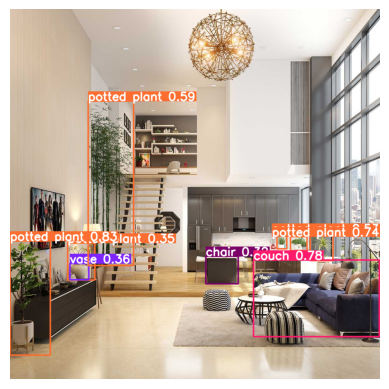

True

In [5]:
%matplotlib inline

from utils.view import view

model = YOLO(MODEL_CODE)
demo_image = "https://media.designcafe.com/wp-content/uploads/2019/11/17060449/Q4aC8wUjahqVLa2vUA5BgXRrzAJSMzDFlwwZ8QFwAhGlDx4fAgLyCZ7ASBin-V9DxAGxg-0R0ngsCX75Fm5KI53AhRsrNnOVSCBCZ5usrlkXhSlyUp7dGFkRWVC1lvLVLOZNNaUX.jpeg"

results = detect(model, demo_image)
plot_result(results[0])
view(results[0].orig_img)

# Model fine-tuning (classification)


In [5]:
# model = YOLO("yolo11x-cls.pt")

# model.train(data="mnist", epochs=4, device="mps", imgsz=32, classes=10, batch=-1)